<a href="https://colab.research.google.com/github/Harshalkumar96/Play_Store_App_Review_EDA_Project/blob/main/Google_App_Rating_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Emporting Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read .csv file and store it in variable

path = ('/content/drive/MyDrive/Capstone Projects csv/googleplaystore.csv')
df = pd.read_csv(path)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Understanding our Dataset

In [5]:
# Show top 5 rows of our data

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Show last 5 rows of our data

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
# number of rows and columns in dataset

df.shape

(10841, 13)

In [8]:
# Showing number of Rows and Columns present in our Dataset 

print(f'Our dataset consist of {df.shape[0]} Rows & {df.shape[1]} Columns')

Our dataset consist of 10841 Rows & 13 Columns


In [9]:
# Let's see some statistics of Numberical Columns in dataset

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Note >** Since we have only on Numerical Column (Rating) so df.describe() showing us only one column 

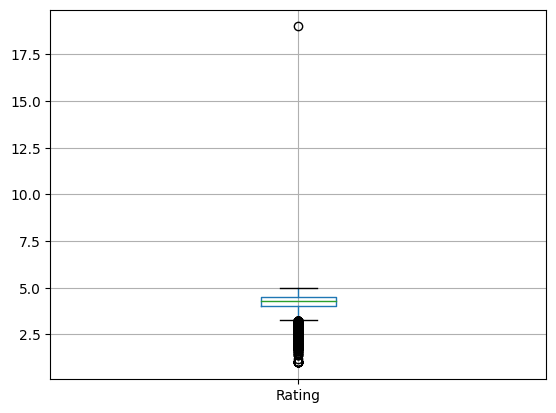

In [10]:
df.boxplot();

Boxplot shows us the Numerical data's plot , So that we can check for any presence of Outliers in our data

And as we can observe above we've found outlier in "Rating" column

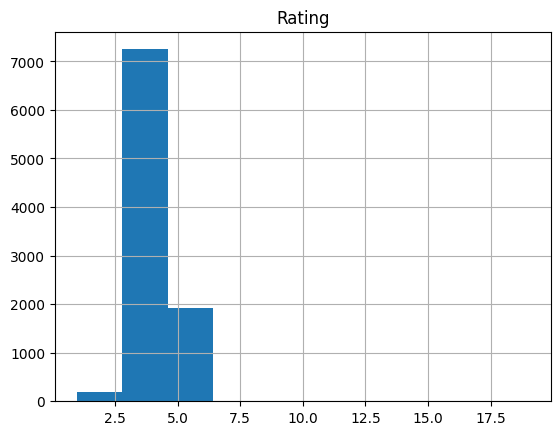

In [11]:
# Now let's see with the help of Histogram also

df.hist();

**Observation >** So we can see above in Histogram the Average values of rating is 4.5, but our rading for histogram is showing Numbers upto 17.5 on X-axis, so we can conclude that their might be few outliers beyond 17.5 

In [12]:
# Checking for how many outliers are there in Rating Column
# As we can see in Boxplot that most of Rating lie between 0-5, So ratings more that 5 are considered as oultiers 

df[df.Rating>5]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Observation >** So we can see above, we've got only 1 outlier their in our "Rating" column

So we can simply drop that row in "Rating" column to get rid off the outlier, Since it is a single row so dropping it will not impact our Results , so we will Remove that row in further Data Cleaning steps of our EDA 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can observer the Number of columns, their names and also their Datatypes above

Also we can see that we only ave 1 Numerical column ("Rating) in our dataset, rest of all columns are of Str datatype  

In [14]:
# Checking for Null Values in dataset

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**Observation >** We have highest NaN values in "Rating" Column (1474 NaN values) , single NaN value in "Type" & "Content Rating" columns respectively and in "Android Ver" column we got 3 NaN values 

#**Data Cleaning**

So we've found the one outlier in our "Rating" column above, let's see that again

In [15]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Row 10472 has the outlier, so we are removing that row now

In [16]:
# Removing Outlier

df.drop([10472], inplace=True)

In [17]:
# Check whether row got deleted or not

df[10470 : 10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


Yes, we can see above row number 10472 is now removed from our dataset

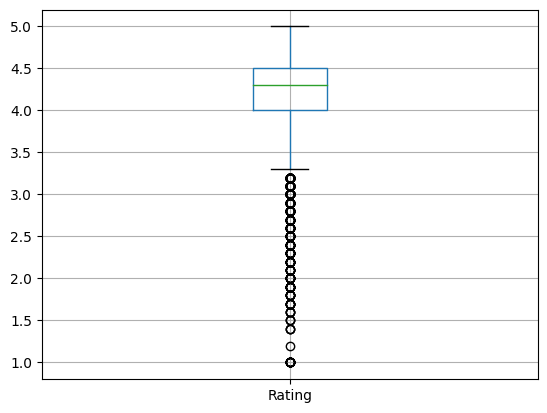

In [18]:
# Again checking for outlier with Boxplot

df.boxplot();

**Observation >** Now we can see in the Boxplot that the outlier value which were present above 17.5 in our earlier Boxplot Visualization is not appearing now 

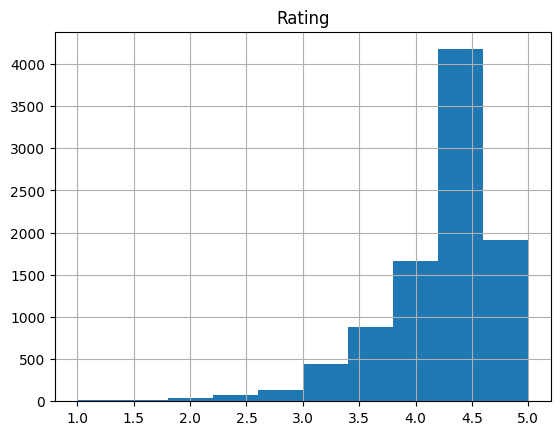

In [19]:
df.hist();

**Observation >** Alos in Histogram, Now we can see values only between 0-5

In [21]:
# Now we are finding the columns which are 90% empty (10% filled column) 

x = len(df) * (10/100)                         #we r storing count of 10% rows in variable here
x

1084.0

In [22]:
# Here we are checking which column is 90% Empty or (say only 10% filled) -- So that we can simply remove such columns

for i in df.columns:
  if (df[i].count()) >= x:
    print(df[i].count(), f'is "{i}" column length, Since it is greater than 10% we cannot remove this column \n')
  else:
    print(df[i].count(), f'is "{i}" column length, Since it is greater than 10% we cannot remove this column \n')


10840 is "App" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Category" column length, Since it is greater than 10% we cannot remove this column 

9366 is "Rating" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Reviews" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Size" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Installs" column length, Since it is greater than 10% we cannot remove this column 

10839 is "Type" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Price" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Content Rating" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Genres" column length, Since it is greater than 10% we cannot remove this column 

10840 is "Last Updated" column length, Since it is greater than 10

So as we can observe that no any column is 90% empty so we cannot remove any column

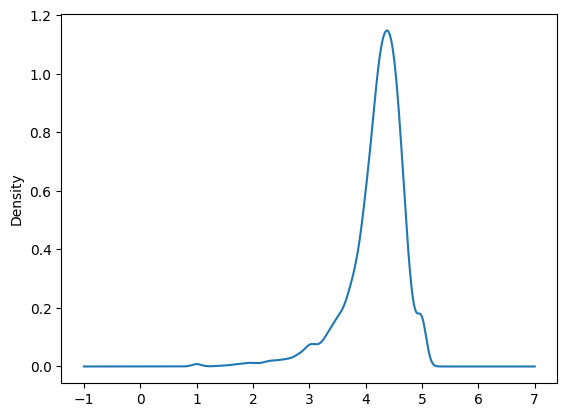

In [23]:
# Let's Visualise the data distribution of "Rating" column since it is having highest NaN values

df['Rating'].plot(kind='kde');

**Observation >** Our "Rating" column contains higher NaN values than any other column in dataset, So we can't just remove it's NaN values, Because will loose much data if we remove the NaN from "Rating" column

Now above in it's Data distribution we can see that it is following the left skewed distribution, So due to it is skewed data distribution we will now replacing it's NaN values by Median

In [24]:
# Now let's fill "Rating" columns using Median

df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [25]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

**Observation >** Now we can see above it is showing 0 NaN values in Rating column

Now we've only "Type", "Current Ver", "Android Ver" Columns are left with the NaN values, Since these columns containing the non-integer data, or also they have few NaN values, so we will replace their NaN values with Mode

In [26]:
# find the Mode of "Type", "Current Ver", "Android Ver" Columns

print(df["Type"].mode())
print(df["Current Ver"].mode())
print(df["Android Ver"].mode())


0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [27]:
# Now fill the NaN with Mode for above 3 columns

df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)


In [28]:
# Now check for NaN again

df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Observation >** Now we can see above that all the NaN values from our dataset are handelled successfully

In [30]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


**Observation >**  

1.   Now from above we caan observe that our "Reviews" column contains Numerical data, still it's datatype is shown as object (Str), So we need to change it's datatype to Numeric 
2.   Same condition with the "Installs" column, also it contains "+" saign in it that sign we don't need at all, so we will remove that also
3.   Same thing we will do with the "Price" Column also, we will replace its "$" sign with empty string





In [34]:
# Here we r replacing "$" sign in 'Price' column with "" empty string
# and converting data in "Reviews" column to numeric data

df['Price'] = df['Price'].apply((lambda x: str(x).replace('$', '') if '$' in str(x) else str(x)))
df['Price'] = df['Price'].apply((lambda x: float(x)))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [35]:
# Here we r replacing "+" & "," in 'Installs' column to empty string

df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x : float(x))


In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [37]:
df.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


**Observation >** Now we can see above that our data set is now much Neat & clean, since we've done some IMP Manipulations on it, 

we've now 4 Numerical columns

### Data Visualization

Now we want to see the Average of "Installs", "Reviews" column & sum if "Price", for each individual category of Apps  

In [40]:
# we've groupby the "Category" column below and doing aggrigation operation on other columns

grp = df.groupby('Category')
x = grp['Installs'].agg(np.mean)
y = grp['Reviews'].agg(np.mean)
z = grp['Price'].agg(np.sum)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

<ipython-input-52-a1e77738db09>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, 'ro-', color='b')


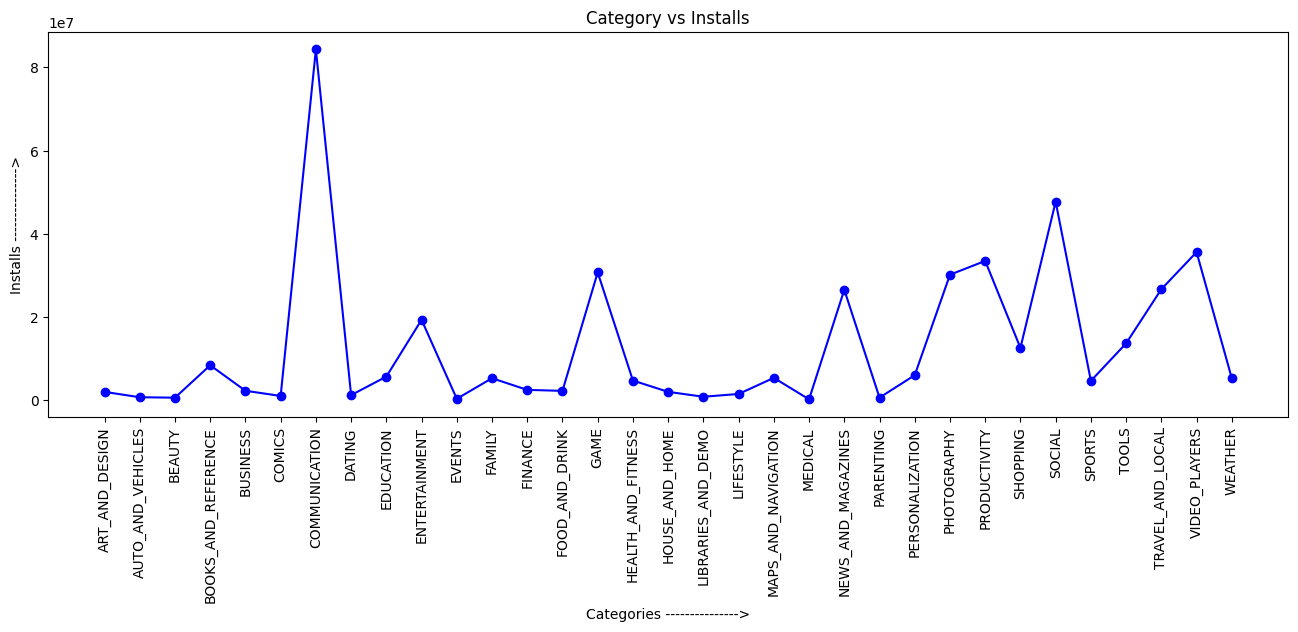

In [52]:
# below we've plot Category vs Installs plot

plt.figure(figsize=(16,5))
plt.plot(x, 'ro-', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories --------------->')
plt.ylabel('Installs --------------->')
plt.show()

<ipython-input-56-3a3c3a1c153a>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(z, 'ro-', color='b')


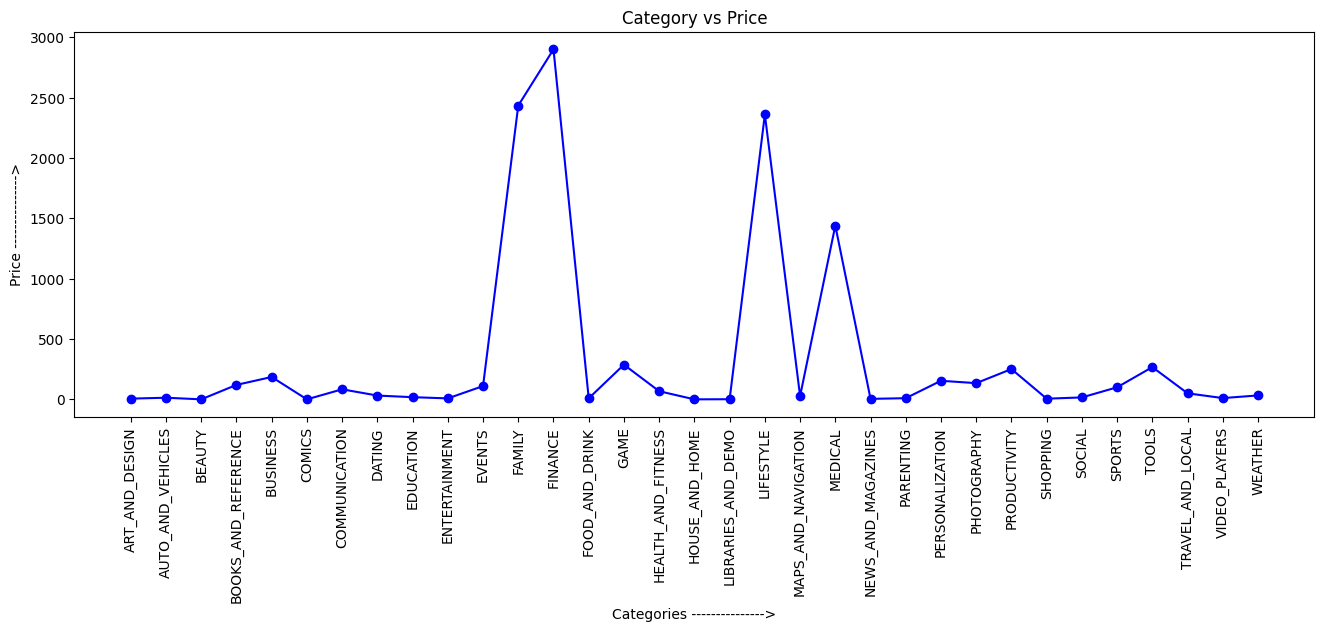

In [56]:
# below we've plot Category vs Price plot

plt.figure(figsize=(16,5))
plt.plot(z, 'ro-', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Price')
plt.xlabel('Categories --------------->')
plt.ylabel('Price --------------->')
plt.show()

<ipython-input-59-0f5af077ef4c>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y, 'ro-', color='b')


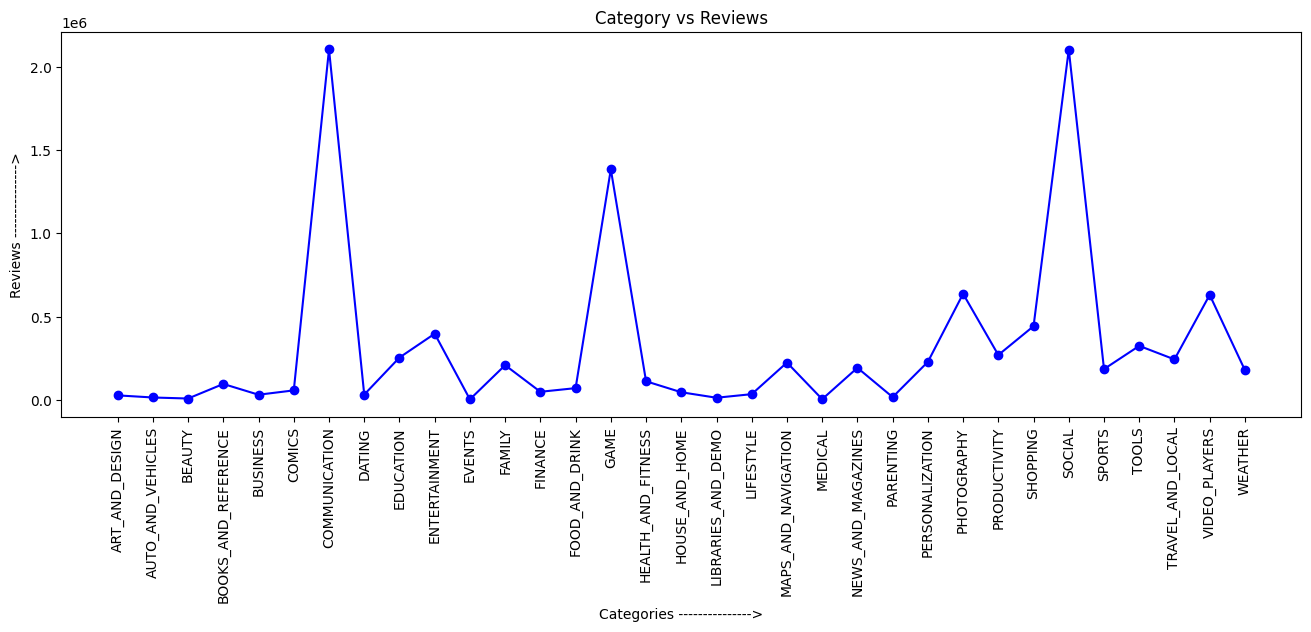

In [59]:
# below we've plot Category vs Reviews plot

plt.figure(figsize=(16,5))
plt.plot(y, 'ro-', color='b')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories --------------->')
plt.ylabel('Reviews --------------->')
plt.show()